In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [19]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S1_Datafile_Concept.csv")

df['DATE'] = pd.to_datetime(df['DATE'])

df = df.sort_values('DATE')

df.set_index('DATE', inplace=True)

df = df.asfreq('MS')

series = df['Consumption']

ses_model = SimpleExpSmoothing(series).fit(optimized=True)
ses_fitted = ses_model.fittedvalues

holt_model = Holt(series).fit(optimized=True)
holt_fitted = holt_model.fittedvalues

hw_model = ExponentialSmoothing(series, trend='add' ,seasonal='add', seasonal_periods=12).fit(optimized=True)
hw_fitted = hw_model.fittedvalues

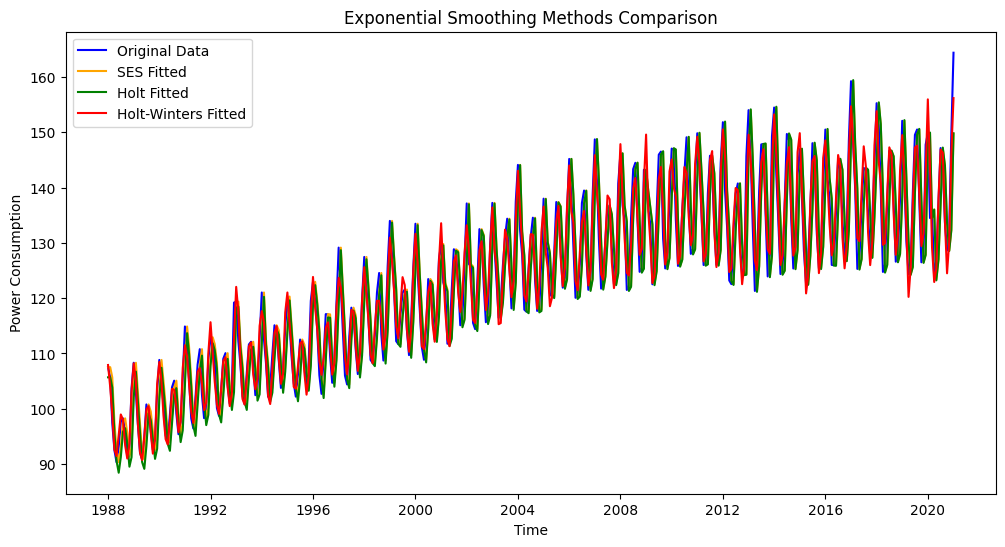

In [20]:
plt.figure(figsize=(12,6))
plt.plot(series, label='Original Data', color='blue')
plt.plot(ses_fitted, label='SES Fitted', color='orange')
plt.plot(holt_fitted, label='Holt Fitted', color='green')
plt.plot(hw_fitted, label='Holt-Winters Fitted', color='red')

plt.title("Exponential Smoothing Methods Comparison")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()